# Decision Tree Classifier

# Loan Approval Prediction 🌐✅

## Overview 📈

Hey there! Welcome to my Loan Approval Prediction project. I've tinkered with the cool Decision Tree algorithm to predict whether a loan gets a thumbs-up or down.

## Problem Statement 🎯

Ever wondered if there's a way to predict if your loan will fly or flop? That's the challenge. I'm using Decision Trees to crack the code and make loan approval predictions smarter.

## Usecase Solved 🌟

Imagine knowing your chances of getting that loan nod. That's the use case! Borrowers get a sneak peek into their loan destiny, and lenders can streamline the approval process. Win-win!

## Benefits 🚀

1. **Spot-On Predictions**: My Decision Tree model is like a loan psychic—pretty darn accurate.

2. **Smart Borrowing**: Folks can use my predictions to plan their financial moves better.

3. **Speedy Lending**: For banks and lenders, it's like a shortcut to quick and efficient loan approvals.

Stay tuned for the journey through data and Decision Trees! 🚀✨


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [57]:
df=pd.read_csv("C:\\Users\\Vichakshan\\Downloads\\ALL DATA SETS\\loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


#### Droping the unnecessary variable 

In [58]:
df=df.drop(['Loan_ID'],axis=1)

#### Here, I am trying to get a sense of the features in the dataset, their datatypes, and a brief summary

In [60]:
df.shape

(381, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


#### Checking the null values

In [62]:
total=df.isnull().sum().sort_values(ascending=False)
per=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
null=pd.concat([total,per],axis=1,keys=['Total', 'Percent'])
null

,Total,Percent
Credit_History,30,0.078740
Self_Employed,21,0.055118
Loan_Amount_Term,11,0.028871
Dependents,8,0.020997
Gender,5,0.013123
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,0,0.000000


#### filling the na values

In [63]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)

#### Rechecking  

In [64]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Performing feature Enginering , transforming the categorical data into numerical

In [65]:
def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1, 3], inplace=True)

In [66]:
c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']

cat_to_num(df, c_variables)

In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


#### Using intuitive thinking, I visualize how the target variable tends to react to different features,First I ask, "Does a person's gender have any impact on the loan status?" , "0 is for male , 1 for Female"

<Axes: xlabel='Gender', ylabel='count'>

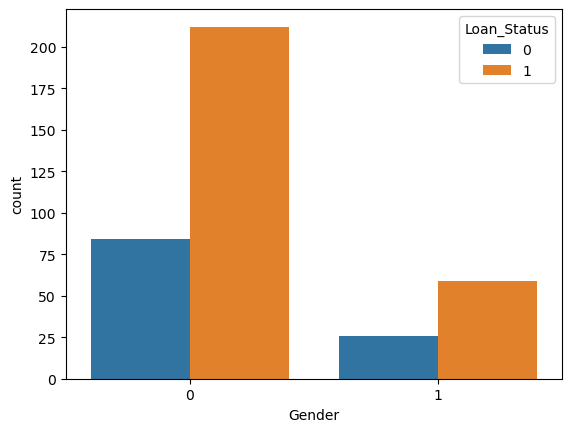

In [68]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

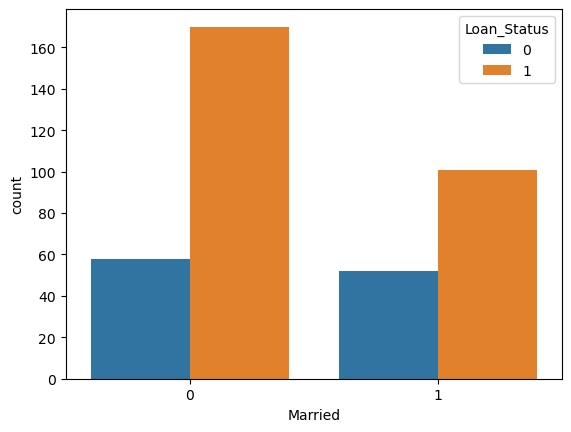

In [69]:
sns.countplot(x='Married',data=df,hue='Loan_Status')

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       381.000000         381.000000  381.000000
mean       3579.845144        1277.272966  104.986877
std        1419.813818        2340.818546   28.358464
min         150.000000           0.000000    9.000000
25%        2600.000000           0.000000   90.000000
50%        3333.000000         983.000000  110.000000
75%        4288.000000        2016.000000  127.000000
max        9703.000000       33837.000000  150.000000


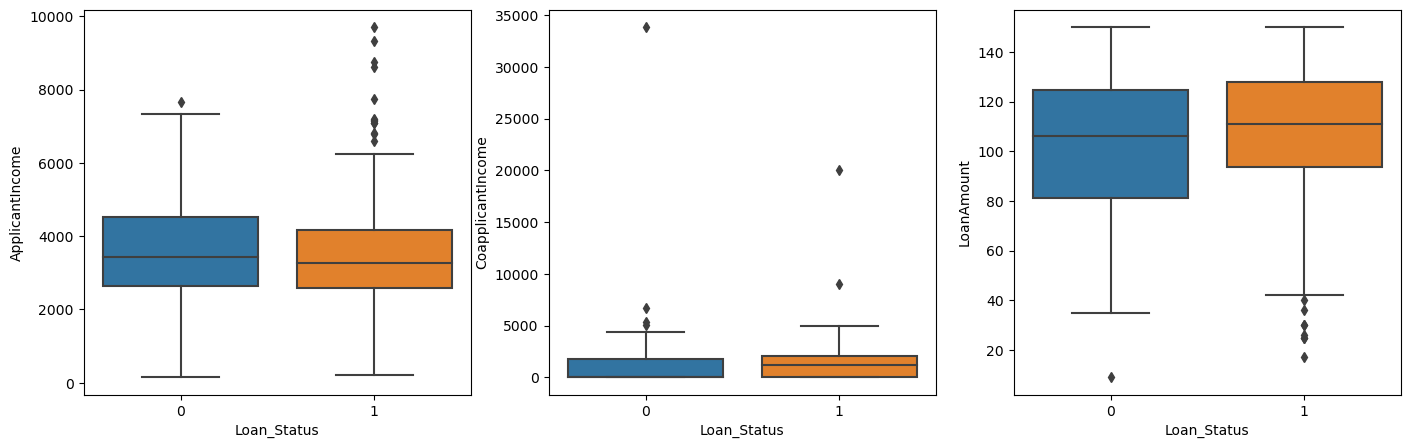

In [70]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

#### Can find some outliers into it , lets remove those, finding their Z score . for better accuracy

In [71]:
from scipy.stats import zscore
z_scores = zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

threshold = 3

outliers_mask = (abs(z_scores) < threshold).all(axis=1)

df_final = df[outliers_mask]

df_final[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,372.000000,372.000000,372.000000
mean,3541.319892,1122.962366,105.314516
std,1303.005610,1253.487239,27.655378
min,150.000000,0.000000,25.000000
25%,2600.000000,0.000000,90.000000
50%,3333.000000,953.000000,110.000000
75%,4281.500000,2000.000000,127.000000
max,7740.000000,6666.000000,150.000000


In [72]:
df_final.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


In [73]:
df_final.shape

(372, 12)

#### Here X holds all the independent variable and y holds the depend or target variable 

In [74]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

#### Splitting the data into training and testing

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Importing the decisiontreeclassifier algorithm for the data

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

#### Training the algorithm

In [78]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

#### Plotting the Accuracy of the model along with ROC score

In [79]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 81.82%
Roc Score: 66.67%


#### The model has the accuracy of 85% tells me that the model is performing quite good.But Maybe I did not treat the variables as well as I could have in the preprocessing phase, Netherless , I am satisfy with my model

#### I conclude my project with a confusion matrix , showcasing how many went True Predicated or False Predicated

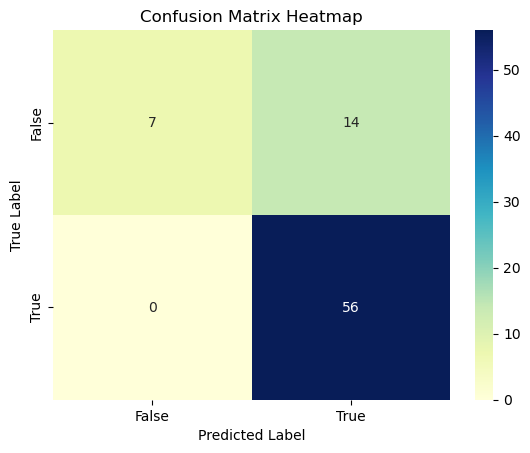

In [80]:
cm=confusion_matrix(y_test , y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Satisfy with the model , i would like to end my project here

And there you have it! Our journey through data, Decision Trees, and loan predictions concludes here.

Happy loan predicting! 🌟✨